# Data exploration

Dit notebook zal worden gebruikt voor het vinden van interessante features.

In [1]:
# imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import TargetEncoder
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Kolommen die niet met n.v.t. of "?" werden aangegeven in de data dictionary.
# Zulke kolommen mochten wij negeren (volgens het interview)
cols_to_use= [
 '#stm_sap_meldnr',
 'stm_mon_nr',
 'stm_vl_post',
 'stm_sap_meld_ddt',
 'stm_sap_meldtekst_lang',
 'stm_sap_meldtekst',
 'stm_geo_mld',
 'stm_equipm_nr_mld',
 'stm_equipm_soort_mld',
 'stm_equipm_omschr_mld',
 'stm_km_van_mld',
 'stm_km_tot_mld',
 'stm_prioriteit',
 'stm_aanngeb_ddt',
 'stm_oh_pg_gst',
 'stm_geo_gst',
 'stm_equipm_nr_gst',
 'stm_equipm_soort_gst',
 'stm_equipm_omschr_gst',
 'stm_km_van_gst',
 'stm_km_tot_gst',
 'stm_oorz_groep',
 'stm_oorz_code',
 'stm_oorz_tkst',
 'stm_fh_ddt',
 'stm_fh_status',
 'stm_sap_storeind_ddt',
 'stm_tao_indicator',
 'stm_tao_indicator_vorige',
 'stm_tao_soort_mutatie',
 'stm_tao_telling_mutatie',
 'stm_tao_beinvloedbaar_indicator',
 'stm_sap_melddatum',
 'stm_sap_meldtijd',
 'stm_contractgeb_mld',
 'stm_techn_mld',
 'stm_contractgeb_gst',
 'stm_techn_gst',
 'stm_aanngeb_dd',
 'stm_aanngeb_tijd',
 'stm_aanntpl_dd',
 'stm_aanntpl_tijd',
 'stm_progfh_in_datum',
 'stm_progfh_in_tijd',
 'stm_progfh_in_invoer_dat',
 'stm_progfh_in_invoer_tijd',
 'stm_progfh_in_duur',
 'stm_progfh_gw_tijd',
 'stm_progfh_gw_lwd_datum',
 'stm_progfh_gw_lwd_tijd',
 'stm_progfh_gw_duur',
 'stm_progfh_gw_teller',
 'stm_fh_dd',
 'stm_fh_tijd',
 'stm_fh_duur',
 'stm_sap_storeinddatum',
 'stm_sap_storeindtijd',
 'stm_oorz_tekst_kort',
 'stm_pplg_van',
 'stm_pplg_naar',
 'stm_dstrglp_van',
 'stm_dstrglp_naar']

In [3]:
df = pd.read_csv("data/sap_storing_data_hu_project.csv", index_col=0, usecols=cols_to_use, engine='pyarrow')

In [4]:
df[['stm_sap_meld_ddt', 'stm_sap_meldtekst_lang','stm_geo_mld', 'stm_fh_duur', 'stm_progfh_in_duur', 'stm_oorz_tekst_kort']].sample(20)

,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_geo_mld,stm_fh_duur,stm_progfh_in_duur,stm_oorz_tekst_kort
#stm_sap_meldnr,,,,,,
80904420,11/01/2018 21:29:40,Kfh-Zv : Stroomvoorz. gestoord.(meld. alleen b...,155,24.0,24,
80457101,24/05/2008 06:43:00,"Asdo 351b-353a,tobs",588,128.0,90,
80681644,28/08/2012 10:35:00,Bkh : Gaarne monteur van Koning & Hartman toe...,564,143.0,14680,
80830457,11/12/2015 15:26:03,Amf : omroep gestoord op Putten en Soest Zuid.,506,0.0,0,
80736013,24/09/2013 15:22:00,Had : Hekwerk gesloopt en staat open op km 25...,85,0.0,14404,
80420581,15/08/2007 05:49:00,utg wmv: tobs achter sein 550 en ahob km 61.0...,78,113.0,155,
80506651,25/05/2009 18:17:00,Mvt : Doorrijhoogte portaal bij snelwegviaduc...,475,1176.0,90,
80709179,04/03/2013 19:34:00,Zd : Installatie controle alarm.,524,703.0,2,
80896151,11/09/2017 19:08:07,"Rtst : Wl 919 melding POSS systeem, wl loopt z...",163,24.0,36,Gestoord object: WISSEL 919A. Gestoord o


## Target variabele aanmaken

Target variabele anm_tot_fh, welke de duur vanaf dat de aannemer ter plaatse is, tot het daadwerkelijke functieherstel. \
Dit is een van de betere keuzes voor de target variabele. \
Neem alle tijdstippen in de dataset: \
Melding komt binnen: Te vroeg, hier is nog maar weinig informatie. \
Aannemer gebeld: Gebeurt vlak nadat de melding binnenkomt. Dit is nog steeds vroeg. \
De aannemer is ten plaatse: Liever een latere prognose, wanneer de aannemer weet wat er aan de hand is. \
Prognose: Dit is de prognose van de aannemer. Interessant maar niet voor target. \
Invoer prognose: Dit zou het ideale punt zijn waarop wij een voorspelling geven. Dit vindt vaker (zie later in het notebook) laat in het proces, en rond functieherstel plaats. Vaak ook erna. \
Functieherstel: Dit is wat we willen weten. \
Einde storing: Dit is later dan wat we willen weten, dus niet relevant. \
Uitgebreide uitleg voor deze keuze is elders te vinden. \
**Conclusie: Wij nemen het tijdsverschil tussen aannemer aankomst en functieherstel**

In [5]:
# Convert columns to datetime type
df['stm_aanntpl_tijd'] = pd.to_datetime(df['stm_aanntpl_tijd'], format='%H:%M:%S', errors='coerce')
df['stm_aanntpl_dd'] = pd.to_datetime(df['stm_aanntpl_dd'], format='%d/%m/%Y', errors='coerce')
df['stm_fh_ddt'] = pd.to_datetime(df['stm_fh_ddt'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Combine date and time columns to a datetime column
df['stm_aanntpl_tijd'] = df['stm_aanntpl_tijd'].astype('str')
df['stm_aanntpl_dd'] = df['stm_aanntpl_dd'].astype('str')
df["aanntpl_ddt"] = df["stm_aanntpl_dd"] + " " + df["stm_aanntpl_tijd"].apply(lambda x: x.split(' ')[-1])
df['aanntpl_ddt'] = pd.to_datetime(df['aanntpl_ddt'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df = df.dropna(subset=['aanntpl_ddt'])

In [6]:
# Maak een kolom met de duur van de aannemer ter plaatse tot functieherstel
df['anm_tot_fh'] = df['stm_fh_ddt'] - df['aanntpl_ddt']
df['anm_tot_fh'] = df['anm_tot_fh'].apply(lambda x: x.seconds/60 + x.days * (24*60))

In [7]:
# Dit haalt zo'n 6000 rijen uit de database, tot 683985
df = df.dropna(subset=['anm_tot_fh'])

We halen negatieve waardes voor de targetvariabele uit de dataset. \
Deze zijn voor ons model, wat de functiehersteltijd wilt berekenen als de aannemer
ter plaatse is gekomen niet relevant. Het probleem is dan namelijk al opgelost. \
\
Verder is ons verteld dat wij storingen met een verwachte functieherstelduur van korter
dan 5 minuten of langer dan 8 uur mogen weglaten. \ 
Deze storingen zijn óf zodanig snel opgelost dat deze niet nuttig zijn om een voorspelling voor te doen, \
óf zodanig lang, dat het treinverkeer toch niet snel zal rijden, en het beter is om af te wachten.

In [8]:
# We halen negatieve waardes voor de targetvariabele uit de data
df = df[df['anm_tot_fh'] >= 0]
# We halen prognoses voor korter dan 5 minuten en langer dan 8 uur uit de data
df = df[(df['anm_tot_fh'] >= 5) & (df['anm_tot_fh'] <= 480)]

Door het aanmaken van de target variabele, NaN's en outliers eruit te halen, komen wij uit op 544583 resultaten.

### Duplicates
Zijn er duplicate in het model (mbt de index)

In [9]:
sum(df.index.duplicated())

194625

In [10]:
sum(df.duplicated())

41699

In [11]:
df = df[~df.index.duplicated(keep='first')]

Het verwijderen van rijen waarvan het #stm_sap_meldnr al eerder in de dataset is voorgekomen, reduceert de dataset tot 349.958.

### Functie voor het verwijderen van outliers

In [12]:
def remove_outlier(df_in, col_name, k=3):
    """Removes rows in the dataframe which values in the given column are more than the given k (or 3) times
    the interquartile range removed from the 25 and/or 75 quantile."""
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 
    fence_low  = q1 - k * iqr
    fence_high = q3 + k * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## Data exploration

#stm_sap_meldnr: De index. Niet een feature \
stm_mon_nr: Monitoringsnummer. Ziet er niet interessant uit. \
stm_vl_post:  \
stm_sap_meld_ddt:  \
stm_sap_meldtekst_lang:  \
stm_sap_meldtekst:  \
stm_geo_mld, stm_geo_gst: De geocode van de storing. Nader onderzoeken. \
stm_equipm_nr_mld \
stm_equipm_soort_mld \
stm_equipm_omschr_mld \
stm_km_van_mld, stm_km_van_gst \
stm_km_tot_mld, stm_km_tot_gst \
stm_prioriteit: Prioriteit van de storing. Interessante kolom. \
stm_aanngeb_ddt \
stm_oh_pg_gst \
stm_equipm_nr_gst \
stm_equipm_soort_gst \
stm_equipm_omschr_gst \
stm_oorz_groep: De oorzaakgroep. Wat is de oorzaak. Klinkt interessant. \
stm_oorz_code: De oorzaakcode. Wat is er mis. Klinkt veelbelovend. \
stm_oorz_tkst \
stm_fh_ddt \
stm_fh_status \
stm_sap_storeind_ddt \
stm_tao_indicator \
stm_tao_indicator_vorige \
stm_tao_soort_mutatie \
stm_tao_telling_mutatie \
stm_tao_beinvloedbaar_indicator \
stm_sap_melddatum \
stm_sap_meldtijd \
stm_contractgeb_mld, stm_contractgeb_gst: Contractgebied storing (aannemer). Klinkt interessant. \
stm_techn_mld, stm_techn_gst: Technieklabel storing. Klinkt interessant. \
stm_aanngeb_dd, stm_aanngeb_tijd: Datum/tijd aannemer gebeld. Buiten target. \
stm_aanntpl_dd, stm_aanntpl_tijd: Begin van duur target variabele. Geen feature. \
stm_progfh_in_datum, stm_progfh_in_tijd: Initiële datum/tijd prognose functieherstel. Zeer interessant. \
stm_progfh_in_invoer_dat, stm_progfh_in_invoer_tijd: Invoer tijd/datum initiële prognose? Interessant. \
stm_progfh_in_duur: Prognose initiële functieherstel. Zeer interessant. \
stm_progfh_gw_tijd, stm_progfh_gw_lwd_datum: Gewijzigde tijd/datum prognose \
stm_progfh_gw_lwd_tijd \
stm_progfh_gw_duur: Duur van de gewijzigde prognose, \
stm_progfh_gw_teller: Hoe vaak is de prognose van de aannemer gewijzigd. Enigzins interessant, moeilijk bruikbaar. \
stm_fh_dd, stm_fh_tijd: Datum/tijd functieherstel. Target valt hierbinnen. Niet interessant. \
stm_fh_duur: Duur vanaf melding tot functieherstel in minuten. Target is pas vanaf ter plaatse. Niet interessant. \
stm_sap_storeinddatum, stm_sap_storeindtijd: Datum/tijd einde storing. Dit is verder dan functieherstel, dus niet interessant. \
stm_oorz_tekst_kort \
stm_pplg_van \
stm_pplg_naar \
stm_dstrglp_van \
stm_dstrglp_naar \

### stm_progfh_in_duur
De initiële prognose in minuten die door de aannemer is gegeven.

Gegeven was dat de prognose van de aannemer vaak pessimistisch is en beïnvloed door financiële invloeden, maar het is wel een prognose die wordt gegeven door een professional die ter plaatse is. Als we deze kunnen gebruiken zou dat heel fijn zijn.

In [13]:
# Remove nonsense values
dfprog = df
dfprog['stm_progfh_in_duur'] = df['stm_progfh_in_duur'].str.extract('(\d+)', expand=False)
dfprog['stm_progfh_in_duur'] = dfprog['stm_progfh_in_duur'].astype('int32')
# Remove default values
dfprog = dfprog[dfprog.stm_progfh_in_duur != 99999999]
dfprog = dfprog[dfprog.stm_progfh_in_duur != 0]

In [14]:
dfprog = remove_outlier(dfprog, 'stm_progfh_in_duur')

Plot voor de prognoseduur tegenover onze target variabele. \
Er is hier voor een lage alpha en s gekozen, om goed te kunnen zien waar de meeste datapunten zitten.

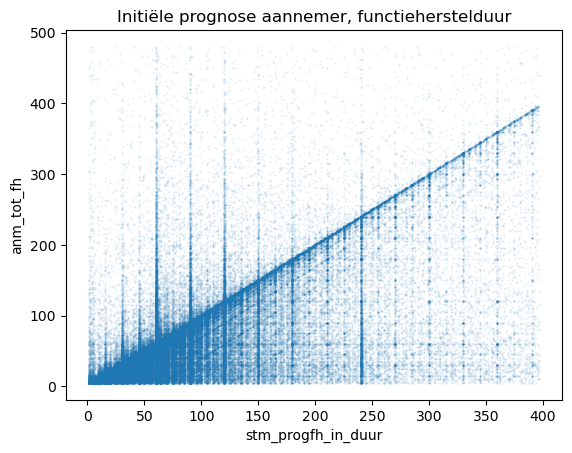

In [15]:
plt.scatter(dfprog['stm_progfh_in_duur'], dfprog['anm_tot_fh'], s=0.3, alpha=0.1)
plt.title('Initiële prognose aannemer, functieherstelduur')
plt.xlabel('stm_progfh_in_duur')
plt.ylabel('anm_tot_fh')
# plt.plot(np.arange(0,500), np.repeat(60, 500))
# plt.plot(np.arange(0, 500), np.arange(0, 500), color='red')
plt.show()

3 conclusies die wij makkelijk kunnen trekken hier zijn:
1. Veel prognoses zijn precies, of heel dichtbij de werkelijke functiehersteltijd (de diagonale lijn)
2. Voor korte reperaties wordt vaak een te hoge prognose gegeven (de driehoek onder de diagonale lijn dicht bij de oorsprong)
3. Er zijn enkele tijden die vaak voorspeld worden (de verticale lijnen)

In [16]:
df.corr(numeric_only=True)['anm_tot_fh']

stm_mon_nr                 0.041779
stm_equipm_nr_mld          0.014369
stm_km_van_mld             0.004790
stm_km_tot_mld             0.025734
stm_prioriteit             0.065964
stm_equipm_nr_gst          0.018163
stm_km_van_gst            -0.000227
stm_km_tot_gst             0.014247
stm_oorz_code             -0.005669
stm_fh_status             -0.043159
stm_tao_telling_mutatie    0.046361
stm_contractgeb_mld       -0.024100
stm_contractgeb_gst       -0.021456
stm_progfh_in_duur        -0.040970
stm_progfh_gw_lwd_datum    0.015491
stm_progfh_gw_teller       0.113057
stm_fh_duur                0.071183
anm_tot_fh                 1.000000
Name: anm_tot_fh, dtype: float64

Wij willen ook gaan onderzoeken wanneer de initiële prognose wordt gegeven, zodat we een idee kunnen krijgen of het redelijk is, om het voor ons model te gebruiken. We willen weten wanneer deze informatie beschikbaar komt, in de tijdlijn tussen dat de aannemer arriveert en functieherstel.

In [17]:
# Convert columns to datetime type
df['stm_progfh_in_invoer_tijd'] = pd.to_datetime(df['stm_progfh_in_invoer_tijd'], format='%H:%M:%S', errors='coerce')
df['stm_progfh_in_invoer_dat'] = pd.to_datetime(df['stm_progfh_in_invoer_dat'], format='%d/%m/%Y', errors='coerce')
df['stm_fh_ddt'] = pd.to_datetime(df['stm_fh_ddt'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Combine date and time columns to a datetime column
df['stm_progfh_in_invoer_tijd'] = df['stm_progfh_in_invoer_tijd'].astype('str')
df['stm_progfh_in_invoer_dat'] = df['stm_progfh_in_invoer_dat'].astype('str')
df["stm_progfh_in_invoer_ddt"] = df["stm_progfh_in_invoer_dat"] + " " + df["stm_progfh_in_invoer_tijd"].apply(lambda x: x.split(' ')[-1])
df['stm_progfh_in_invoer_ddt'] = pd.to_datetime(df['stm_progfh_in_invoer_ddt'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df = df.dropna(subset=['stm_progfh_in_invoer_ddt'])

In [18]:
# Verschil in minuten tussen aannemer ter plaatse en prognose
df['duur_tot_prog'] = df['stm_progfh_in_invoer_ddt'] - df['aanntpl_ddt']
df['duur_tot_prog'] = df['duur_tot_prog'].apply(lambda x: x.seconds/60 + x.days * (24*60))

In [19]:
# Tijdlijn tov onze target.
# 0 is aannemer ter plaatse
# 1 is functieherstel
# 0.5 zou dan halverwege de reparatie zijn
df['prog_tov_fh_tijdstip'] = df['duur_tot_prog'] / df['anm_tot_fh']

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc4a3785850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc4a360f6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc4a360cc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4a36110d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4a3612350>],
 'means': []}

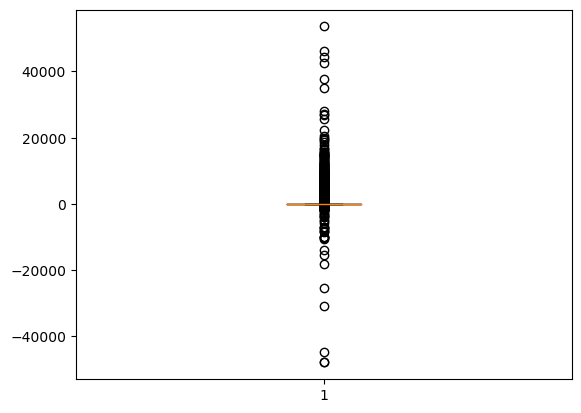

In [20]:
# Boxplot van het tijdstip van de invoer prognose t.o.v. de tijdlijn aannemer ter plaatse 
plt.boxplot(df['prog_tov_fh_tijdstip'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc4a36a8dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc4a36a96d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc4a36502d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc4a36b4090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc4a36b6fd0>],
 'means': []}

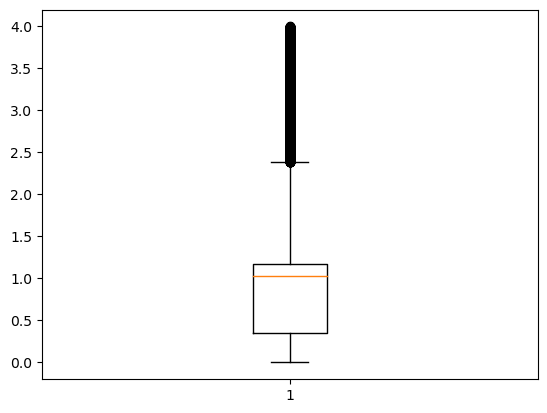

In [21]:
plt.boxplot(df[(df.prog_tov_fh_tijdstip < 4) & (df.prog_tov_fh_tijdstip > 0)]['prog_tov_fh_tijdstip'])

In [22]:
df['stm_progfh_in_duur'].sample(20)

#stm_sap_meldnr
80782583     88
80742819     85
80524831     30
80672571    123
80465304     35
80632048     60
80351071     59
80812839     35
80554567    210
80766086     30
80469279     90
80904754     61
80661227     32
80527833     39
80358676    269
80570977     90
80365919     60
80682971     44
80615856    160
80450078     14
Name: stm_progfh_in_duur, dtype: int32

Het lijkt erop dat de initiële prognose, óf geupdate wordt, of inderdaad gewoon laat wordt gegeven (de mediaan zit rond het tijdstip van functieherstel). Misschien wordt het wel eerder gecommuniceerd, maar wordt het pas laat in de database ingevoerd. In ieder geval kunnen wij niet verwachten dat wij vroeg in het proces een prognose van de aannemer hebben op basis van de data die bij ons bekend is.

### stm_oorz_groep
Labels voor enkele oorzaaksgroepen.

In [23]:
df['stm_oorz_groep'].unique()

array(['TECHONV', 'ONR-DERD', 'ONR-RIB', 'WEER', ''], dtype=object)

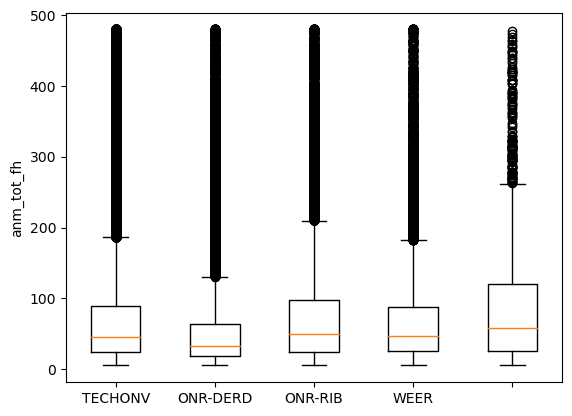

In [24]:
boxplot_data = [df[df.stm_oorz_groep == value]['anm_tot_fh'] for value in df['stm_oorz_groep'].unique()]

fig, ax = plt.subplots()
ax.boxplot(boxplot_data)
ax.set_xticklabels(df['stm_oorz_groep'].unique())
ax.set_ylabel('anm_tot_fh')
plt.show()

In [25]:
for value in ['ONR-RIB', 'ONR-DERD', 'TECHONV', 'WEER']:
    print(df[df.stm_oorz_groep == value]['anm_tot_fh'].quantile([0.25, 0.5, 0.75]))

0.25    24.0
0.50    49.0
0.75    98.0
Name: anm_tot_fh, dtype: float64
0.25    18.0
0.50    33.0
0.75    63.0
Name: anm_tot_fh, dtype: float64
0.25    24.0
0.50    45.0
0.75    89.0
Name: anm_tot_fh, dtype: float64
0.25    25.0
0.50    46.0
0.75    88.0
Name: anm_tot_fh, dtype: float64


De verdelingen van de oorzaakgroepen verschillen tamelijk. Het zou interessant zijn om te kijken of het model hier gebruik van maakt.

### stm_geo_mld

Text(0, 0.5, 'Mediaan anm_tot_fh per geocode')

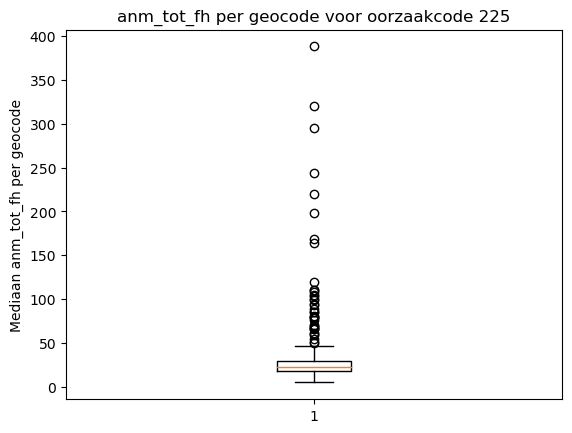

In [26]:
# Mediaan van de target op basis van een specifieke oorzaakcode voor alle geocodes.
median_time = []
for value in df['stm_geo_mld'].unique():
    median_time.append(df[(df.stm_geo_mld == value) & (df.stm_oorz_code == 225)]['anm_tot_fh'].median())

median_time = [x for x in median_time if str(x) != 'nan']

plt.boxplot(median_time)
plt.title('anm_tot_fh per geocode voor oorzaakcode 225')
plt.ylabel('Mediaan anm_tot_fh per geocode')

Op de bovenstaande grafiek is te zien dat voor oorzaakcode 225, doorbranden, de mediaan van de hersteltijd voor de verschillende geocodes ver uit elkaar liggen. \
Er is voor oorzaakcode 225 gekozen, omdat deze, van de meest voorkomende oorzaakcodes, verwacht werd het meest consistent te zijn. \
Variaties in deze boxplot zeggen nemen niet mee, dat er een verschil is in doorbrandingen, of dat bepaalde geocodes juist ongelukkig enkele langdurige functiehersteltijden hebben gehad. Dat is iets om nader te onderzoeken. \
Er is hier te zien dat er grote verschillen zitten in sommige geocodes, maar dat de meeste geocodes wel rond hetzelfde punt zitten. Het lijkt interessant genoeg om mee te nemen in de modellen, om te kijken wat deze er mee doen.

### stm_contractgeb_mld

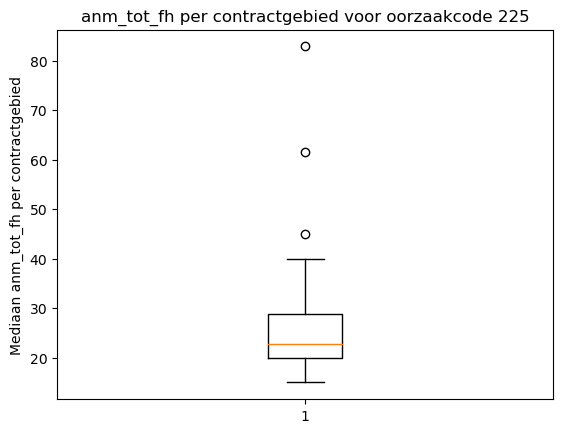

In [27]:
# Mediaan van de target op basis van een specifieke oorzaakcode voor alle contractgebieden.
contract_time = []
for cont in df['stm_contractgeb_mld'].unique():
    contract_time.append(df[(df.stm_contractgeb_mld == cont) & (df.stm_oorz_code == 225)]['anm_tot_fh'].median())

contract_time = [x for x in contract_time if str(x) != 'nan']

plt.boxplot(contract_time)
plt.title('anm_tot_fh per contractgebied voor oorzaakcode 225')
plt.ylabel('Mediaan anm_tot_fh per contractgebied')
plt.show()

Hier is te zijn dat, hoewel de waardes niet ver uit elkaar liggen, in sommige contractgebieden de hersteltijd tot functieherstel makkelijk tot anderhalf keer zo'n hoge waarde kan komen als in andere. \
Het lijkt ons dus nuttig om ook dit mee te nemen in ons model.

### stm_prioriteit

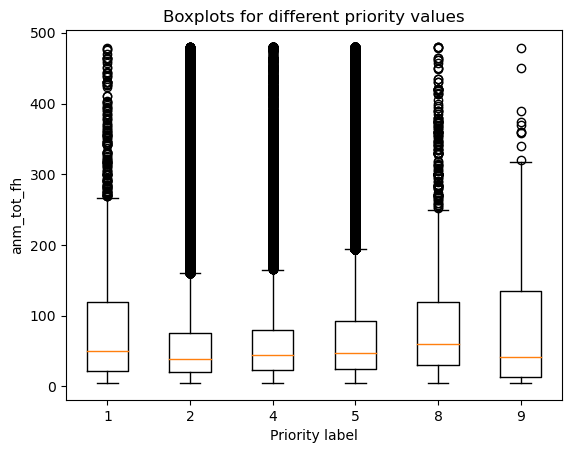

In [28]:
boxplot_data = [df[df.stm_prioriteit == value]['anm_tot_fh'] for value in [1,2,4,5,8,9]]

fig, ax = plt.subplots()
ax.boxplot(boxplot_data)
ax.set_xticklabels([1,2,4,5,8,9])
ax.set_xlabel('Priority label')
ax.set_ylabel('anm_tot_fh')
plt.title('Boxplots for different priority values')
plt.show()

Uit de boxplots blijkt wel dat er verschillen zit in de spreiding van onze target op basis van verschillende prioriteit labels. \
Dit, gecombineerd met de informatie die uit de interviews naar voren is gekomen, heeft ons laten besluiten om dit mee te nemen in het model.

### stm_techn_mld
Op welk techniekveld de storing betrekking heeft.

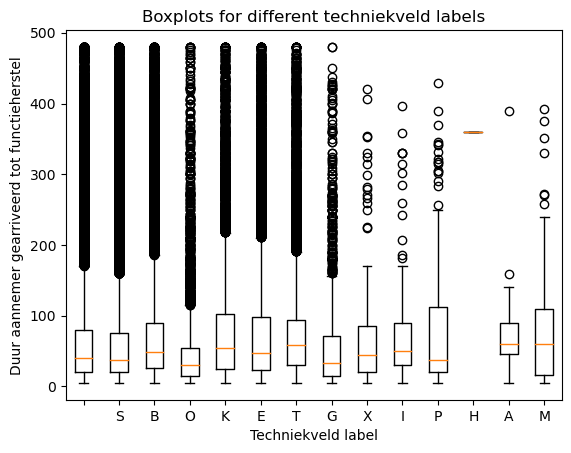

In [29]:
boxplot_data = [df[df.stm_techn_mld == value]['anm_tot_fh'] for value in df['stm_techn_mld'].unique()]

fig, ax = plt.subplots()
ax.boxplot(boxplot_data)
ax.set_xticklabels(df['stm_techn_mld'].unique())
ax.set_xlabel('Techniekveld label')
ax.set_ylabel('Duur aannemer gearriveerd tot functieherstel')
plt.title('Boxplots for different techniekveld labels')
plt.show()

Sommige van deze waardes hebben redelijk andere verdelingen dan anderen. Het lijkt daarom interessant om deze feature mee te nemen in het model.

### stm_oorzaak_code
Oorzaakcode van de storing

In [30]:
len(df['stm_oorz_code'].unique())

72

In [31]:
# pd.options.display.max_rows = 1000
with pd.option_context("display.max_rows", 100):
    print(df['stm_oorz_code'].value_counts())

221.0    37544
218.0    35671
215.0    33231
145.0    14526
133.0    13414
135.0    13046
151.0    10620
213.0     8741
143.0     8332
225.0     7145
140.0     5198
147.0     5145
212.0     4573
203.0     4429
298.0     4104
219.0     3201
207.0     2963
230.0     2932
146.0     2868
183.0     2795
241.0     2603
181.0     2375
226.0     2366
150.0     2356
227.0     2340
184.0     2331
186.0     2166
182.0     2035
149.0     1910
209.0     1757
228.0     1421
214.0     1252
294.0     1200
220.0     1198
187.0     1186
154.0     1157
132.0     1088
229.0     1052
223.0     1020
222.0      986
211.0      979
148.0      892
210.0      867
144.0      806
240.0      720
201.0      641
299.0      625
242.0      594
188.0      362
185.0      340
204.0      337
208.0      291
224.0      269
141.0      206
234.0      192
142.0      166
250.0      130
235.0      105
231.0       89
134.0       79
189.0       77
999.0       46
239.0       45
131.0       43
206.0       35
130.0       29
202.0     

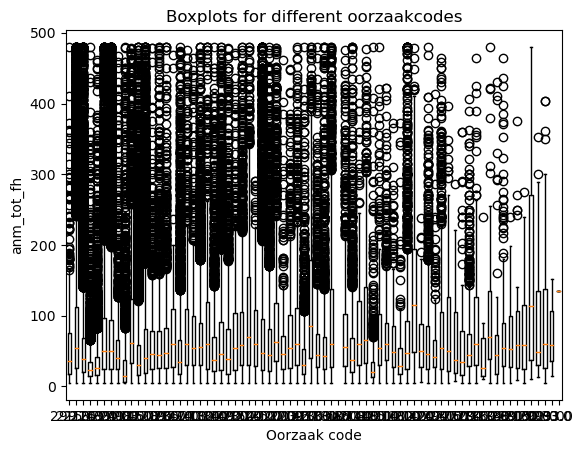

In [32]:
boxplot_data = [df[df.stm_oorz_code == value]['anm_tot_fh'] for value in df['stm_oorz_code'].unique()]

fig, ax = plt.subplots()
ax.boxplot(boxplot_data)
ax.set_xticklabels(df['stm_oorz_code'].unique())
ax.set_xlabel('Oorzaak code')
ax.set_ylabel('anm_tot_fh')
plt.title('Boxplots for different oorzaakcodes')
plt.show()

Verschillende oorzaakcodes hebben extreem ander verdelingen dan sommige andere. Het lijkt ons ze

### stm_equipm_soort_mld
Met welk equipment de storing is?

In [40]:
df['stm_equipm_soort_mld'].value_counts()[:8]

              49066
WISSEL        40242
OVERWEG       25569
SEIN          23925
DETGRSSSL     10985
RISANALOOG     7667
DETECTREIN     7407
TIJDKLOK       4593
Name: stm_equipm_soort_mld, dtype: int64

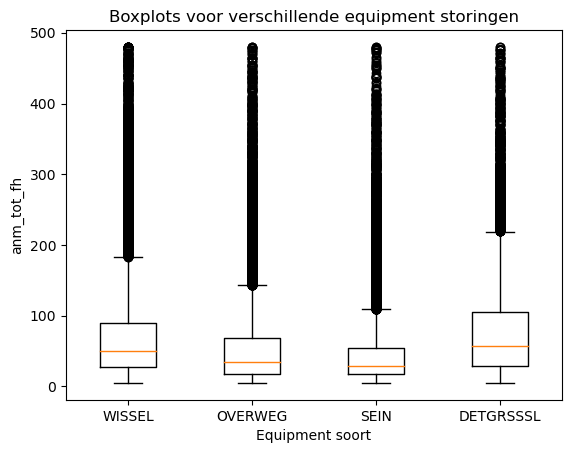

In [39]:
boxplot_data = [df[df.stm_equipm_soort_mld == value]['anm_tot_fh'] for value in ['WISSEL', 'OVERWEG', 'SEIN', 'DETGRSSSL']]

fig, ax = plt.subplots()
ax.boxplot(boxplot_data)
ax.set_xticklabels(['WISSEL', 'OVERWEG', 'SEIN', 'DETGRSSSL'])
ax.set_xlabel('Equipment soort')
ax.set_ylabel('anm_tot_fh')
plt.title('Boxplots voor verschillende equipment storingen')
plt.show()

Het feit dat ons model eerder van een feature met een vergelijkbare verdeling, geen gebruik maakte, combineerd met de hoge missende waardes, en geen grote verschillen in de meest voorkomende waardes, is er besloten niet van deze feature gebruik te maken. 